In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=21f829f6ab7e209aa557f7454136547ed546a2ccd31701a206801d9fba94d54b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/BIG DATA/data/processed_data/Clean_Data'

In [3]:
# https://drive.google.com/file/d/1-kaK4t3gm2WwZTU-Jy--UiEKAHNUcDi_/view?usp=sharing
!gdown 1-kaK4t3gm2WwZTU-Jy--UiEKAHNUcDi_

Downloading...
From: https://drive.google.com/uc?id=1-kaK4t3gm2WwZTU-Jy--UiEKAHNUcDi_
To: /content/part-00000-b07e9c90-0fcb-4170-9c58-be3487cc992b-c000.csv
100% 70.3M/70.3M [00:00<00:00, 194MB/s]


In [4]:
data_path = '/content/part-00000-b07e9c90-0fcb-4170-9c58-be3487cc992b-c000.csv'

In [5]:
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.config('spark.driver.memory', '11g').getOrCreate()

import plotly.express as px
from pyspark.sql.types import StructType, StructField, StringType, FloatType, DateType, IntegerType
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.functions import desc
import pandas as pd

In [6]:
from pyspark.sql.functions import to_date

df = spark.read.csv(data_path,header=True
                    , inferSchema=True
                    )
df.printSchema()

root
 |-- Invoice: integer (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- TotalPrice: double (nullable = true)



In [7]:
df = df.withColumn('InvoiceDate', to_date('InvoiceDate', 'dd/MM/yyyy HH:mm'))
df.printSchema()

root
 |-- Invoice: integer (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: date (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- TotalPrice: double (nullable = true)



In [8]:
df.show(5)

+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
|Invoice|StockCode|         Description|Quantity|InvoiceDate|Price|CustomerID|       Country|TotalPrice|
+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
| 489437|    10002|INFLATABLE POLITI...|      12| 2009-12-01| 0.85|     15362|United Kingdom|      10.2|
| 489441|    22111|SCOTTIE DOG HOT W...|      48| 2009-12-01| 4.25|     18087|United Kingdom|     204.0|
| 489446|    20728| LUNCH BAG CARS BLUE|      10| 2009-12-01| 1.65|     13758|United Kingdom|      16.5|
| 489517|    21821|GLITTER STAR GARL...|       1| 2009-12-01| 3.75|     16329|United Kingdom|      3.75|
| 489517|    21491|SET OF THREE VINT...|       1| 2009-12-01| 1.95|     16329|United Kingdom|      1.95|
+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
only showing top 5 rows



In [9]:
df.count()

779425

# Truy vấn cơ bản

## Số hóa đơn theo ngày

In [10]:
df.createOrReplaceTempView("df")                    # Create a Spark Table

+---------------+---------------------+
|InvoiceDateOnly|Invoice Count Per Day|
+---------------+---------------------+
|     2009-12-01|                   98|
|     2009-12-02|                  110|
|     2009-12-03|                  122|
|     2009-12-04|                   80|
|     2009-12-05|                   30|
|     2009-12-06|                   72|
|     2009-12-07|                   94|
|     2009-12-08|                  102|
|     2009-12-09|                   77|
|     2009-12-10|                   87|
|     2009-12-11|                   65|
|     2009-12-13|                   69|
|     2009-12-14|                   80|
|     2009-12-15|                   94|
|     2009-12-16|                   90|
|     2009-12-17|                   84|
|     2009-12-18|                   61|
|     2009-12-20|                   32|
|     2009-12-21|                   31|
|     2009-12-22|                   21|
+---------------+---------------------+
only showing top 20 rows



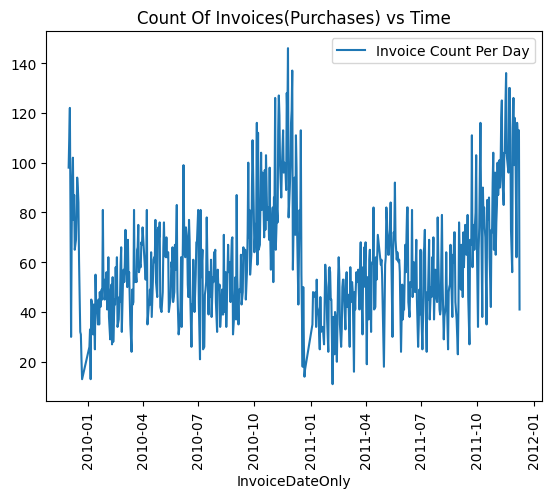

In [11]:
from pyspark.sql.functions import to_date
from pyspark.sql import functions as F

df1 = df.withColumn("InvoiceDateOnly", to_date("InvoiceDate"))

df_TotalInvoicesByDate = df1.groupby("InvoiceDateOnly").agg(F.countDistinct("Invoice").alias("Invoice Count Per Day")).orderBy("InvoiceDateOnly")

df_TotalInvoicesByDate.show()

pandas_df = df_TotalInvoicesByDate.toPandas()
pandas_df.plot(x="InvoiceDateOnly", y="Invoice Count Per Day", kind='line', rot='vertical',title='Count Of Invoices(Purchases) vs Time');

##Top 10 khách hàng chi nhiều tiền nhất



+----------+----------+
|CustomerID|TotalPrice|
+----------+----------+
|     18102|  580987.0|
|     14646|  528603.0|
|     14156|  313438.0|
|     14911|  291421.0|
|     17450|  244784.0|
|     13694|  195641.0|
|     17511|  172133.0|
|     16446|  168473.0|
|     16684|  147143.0|
|     12415|  144458.0|
+----------+----------+



<Axes: title={'center': 'Top 10 Total Price by CustomerID (Descending)'}, ylabel='CustomerID'>

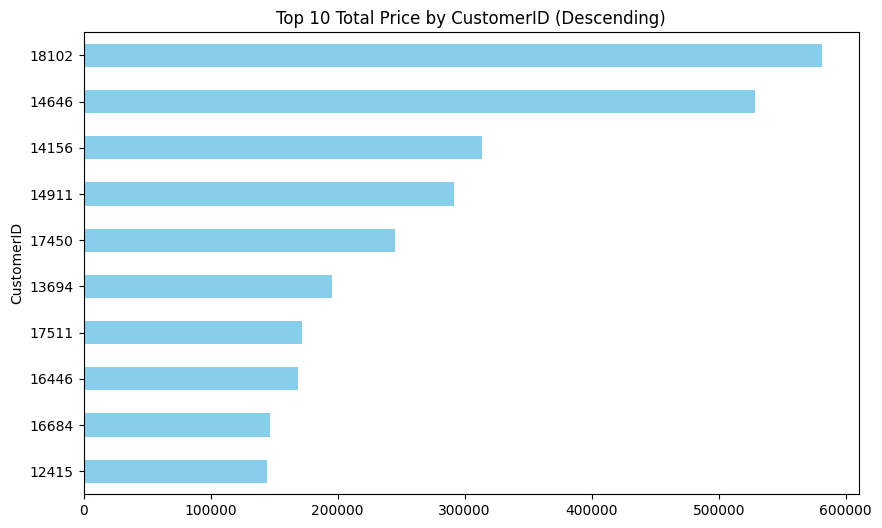

In [12]:
df2=spark.sql("SELECT CustomerID, round(SUM(TotalPrice)) TotalPrice FROM df GROUP BY CustomerID order by TotalPrice DESC limit 10 ")
df2.show()
pandas_df2 = df2.toPandas()
pandas_df2_reverse = pandas_df2[::-1]  # Đảo ngược thứ tự của DataFrame
pandas_df2_reverse.plot(x="CustomerID", y="TotalPrice", kind='barh', color='skyblue', legend=False, figsize=(10, 6), title='Top 10 Total Price by CustomerID (Descending)')

Số lượng khách hàng, số hóa đơn, tổng tiền chi ra theo quốc gia

In [13]:
df3 = spark.sql("SELECT Country, COUNT(DISTINCT CustomerID) AS CustomerCount,COUNT(DISTINCT Invoice) AS InvoiceCount, round(sum(TotalPrice)) as TotalPrice  \
                 FROM df \
                 GROUP BY Country \
                 ORDER BY CustomerCount DESC")
df3.show()

+---------------+-------------+------------+-----------+
|        Country|CustomerCount|InvoiceCount| TotalPrice|
+---------------+-------------+------------+-----------+
| United Kingdom|         5350|       33541|1.4389235E7|
|        Germany|          107|         789|   425020.0|
|         France|           95|         614|   348769.0|
|          Spain|           41|         154|   108332.0|
|        Belgium|           29|         149|    65388.0|
|       Portugal|           24|          93|    55555.0|
|    Switzerland|           22|          90|   100062.0|
|    Netherlands|           22|         228|   554038.0|
|         Sweden|           19|         104|    91516.0|
|          Italy|           17|          65|    32108.0|
|      Australia|           15|          95|   169283.0|
|        Finland|           14|          57|    29926.0|
|         Norway|           13|          45|    56323.0|
|Channel Islands|           13|          55|    44623.0|
|        Austria|           13|

## Những quốc gia có số lượng khách hàng nhiều nhất (Top 15)

+---------------+-------------+
|        Country|CustomerCount|
+---------------+-------------+
| United Kingdom|         5350|
|        Germany|          107|
|         France|           95|
|          Spain|           41|
|        Belgium|           29|
|       Portugal|           24|
|    Switzerland|           22|
|    Netherlands|           22|
|         Sweden|           19|
|          Italy|           17|
|      Australia|           15|
|        Finland|           14|
|         Norway|           13|
|Channel Islands|           13|
|        Austria|           13|
+---------------+-------------+



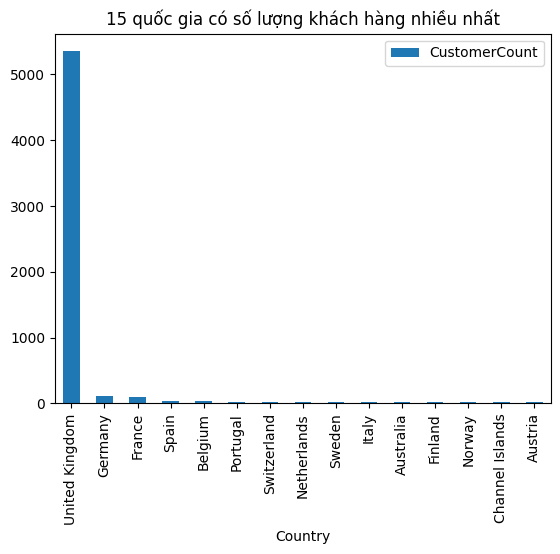

In [14]:
df4 = spark.sql("SELECT Country, COUNT(DISTINCT CustomerID) AS CustomerCount \
                 FROM df \
                 GROUP BY Country \
                 ORDER BY CustomerCount DESC limit 15")

df4.show()

pandas_df4 = df4.toPandas()
pandas_df4.plot(x="Country", y="CustomerCount", kind='bar', rot='vertical',title='15 quốc gia có số lượng khách hàng nhiều nhất');


## Những sản phẩm được khách hàng chi nhiều tiền nhất.

In [15]:
most_preferred_products = spark.sql("SELECT Description, COUNT(*) AS Count FROM df GROUP BY Description ORDER BY Count DESC LIMIT 10")
most_preferred_products.show()
most_preferred_products = most_preferred_products.toPandas()
# Create the bar plot

# Đổi tên cột
most_preferred_products.columns = ['Product', 'Count']

# Tạo biểu đồ
fig = px.bar(most_preferred_products,
             x='Product',
             y='Count',
             color='Product',
             text='Count',
             title='Top 10 Most Preferred Products Per Shop',
             labels={'Product': 'Product', 'Count': 'Count'})



# Show the plot
fig.show()

+--------------------+-----+
|         Description|Count|
+--------------------+-----+
|WHITE HANGING HEA...| 5016|
|REGENCY CAKESTAND...| 3335|
|ASSORTED COLOUR B...| 2692|
|JUMBO BAG RED RET...| 2641|
|       PARTY BUNTING| 2098|
|LUNCH BAG  BLACK ...| 2045|
|REX CASH+CARRY JU...| 1950|
|LUNCH BAG SPACEBO...| 1890|
|STRAWBERRY CERAMI...| 1859|
|HOME BUILDING BLO...| 1852|
+--------------------+-----+



# RFM model

## Tính điểm R

In [16]:
df.show(5)

+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
|Invoice|StockCode|         Description|Quantity|InvoiceDate|Price|CustomerID|       Country|TotalPrice|
+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
| 489437|    10002|INFLATABLE POLITI...|      12| 2009-12-01| 0.85|     15362|United Kingdom|      10.2|
| 489441|    22111|SCOTTIE DOG HOT W...|      48| 2009-12-01| 4.25|     18087|United Kingdom|     204.0|
| 489446|    20728| LUNCH BAG CARS BLUE|      10| 2009-12-01| 1.65|     13758|United Kingdom|      16.5|
| 489517|    21821|GLITTER STAR GARL...|       1| 2009-12-01| 3.75|     16329|United Kingdom|      3.75|
| 489517|    21491|SET OF THREE VINT...|       1| 2009-12-01| 1.95|     16329|United Kingdom|      1.95|
+-------+---------+--------------------+--------+-----------+-----+----------+--------------+----------+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import min, max

spark = SparkSession.builder.appName("InvoiceDateMinMax").getOrCreate()

# Tìm ngày min và max trong bộ dữ liệu
result = df.agg(min("InvoiceDate").alias("MinInvoiceDate"), max("InvoiceDate").alias("MaxInvoiceDate"))
result.show()

+--------------+--------------+
|MinInvoiceDate|MaxInvoiceDate|
+--------------+--------------+
|    2009-12-01|    2011-12-09|
+--------------+--------------+



In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import max as spark_max, datediff, lit
from pyspark.sql.window import Window
from pyspark.sql.functions import ntile

spark = SparkSession.builder.appName("RFMRecency").getOrCreate()

# Tính lần mua gần nhất của mỗi khách hàng
most_recent_purchase = df.groupBy("CustomerID").agg(spark_max("InvoiceDate").alias("MaxPurchaseDate"))

# Tính date diff giữa ngày đó và 12/09/2011 (ngày cuối cùng trong bộ dữ liệu)
reference_date = "2011-12-09"
recency_df = most_recent_purchase.withColumn("DateDiff", datediff(lit(reference_date), "MaxPurchaseDate"))

# Tính điểm R cho mỗi khách hàng dựa vào phân vị
window_spec = Window.orderBy(recency_df["DateDiff"].desc())
recency_df = recency_df.withColumn("R_Quartile", ntile(3).over(window_spec))

recency_df.show()

+----------+---------------+--------+----------+
|CustomerID|MaxPurchaseDate|DateDiff|R_Quartile|
+----------+---------------+--------+----------+
|     14654|     2009-12-01|     738|         1|
|     17056|     2009-12-01|     738|         1|
|     12636|     2009-12-01|     738|         1|
|     17592|     2009-12-01|     738|         1|
|     13526|     2009-12-01|     738|         1|
|     17606|     2009-12-02|     737|         1|
|     15833|     2009-12-02|     737|         1|
|     14980|     2009-12-02|     737|         1|
|     17909|     2009-12-02|     737|         1|
|     14106|     2009-12-02|     737|         1|
|     17087|     2009-12-02|     737|         1|
|     17818|     2009-12-02|     737|         1|
|     14347|     2009-12-03|     736|         1|
|     17271|     2009-12-03|     736|         1|
|     12934|     2009-12-03|     736|         1|
|     16301|     2009-12-03|     736|         1|
|     14750|     2009-12-03|     736|         1|
|     15794|     200

In [19]:
recency_df.orderBy("DateDiff", ascending=True).show()

+----------+---------------+--------+----------+
|CustomerID|MaxPurchaseDate|DateDiff|R_Quartile|
+----------+---------------+--------+----------+
|     17389|     2011-12-09|       0|         3|
|     12433|     2011-12-09|       0|         3|
|     17754|     2011-12-09|       0|         3|
|     16954|     2011-12-09|       0|         3|
|     17001|     2011-12-09|       0|         3|
|     12662|     2011-12-09|       0|         3|
|     13426|     2011-12-09|       0|         3|
|     12713|     2011-12-09|       0|         3|
|     14422|     2011-12-09|       0|         3|
|     18102|     2011-12-09|       0|         3|
|     14051|     2011-12-09|       0|         3|
|     16558|     2011-12-09|       0|         3|
|     12526|     2011-12-09|       0|         3|
|     16446|     2011-12-09|       0|         3|
|     15311|     2011-12-09|       0|         3|
|     12423|     2011-12-09|       0|         3|
|     16626|     2011-12-09|       0|         3|
|     12518|     201

## Tính điểm F

In [20]:
# Đếm số lần khách hàng mua hàng bằng cách đếm số lượng hóa đơn
frequency_df = df.groupBy("CustomerID").agg(F.countDistinct("InvoiceDate").alias("Count"))

# Tính điểm F cho mỗi khách hàng dựa vào phân vị
window_spec = Window.orderBy(frequency_df["Count"].asc())
frequency_df = frequency_df.withColumn("F_Quartile", ntile(3).over(window_spec))

frequency_df.show()

+----------+-----+----------+
|CustomerID|Count|F_Quartile|
+----------+-----+----------+
|     15846|    1|         1|
|     15790|    1|         1|
|     14832|    1|         1|
|     12799|    1|         1|
|     13289|    1|         1|
|     16339|    1|         1|
|     18024|    1|         1|
|     13840|    1|         1|
|     15619|    1|         1|
|     18201|    1|         1|
|     13622|    1|         1|
|     15004|    1|         1|
|     17688|    1|         1|
|     17607|    1|         1|
|     12715|    1|         1|
|     12611|    1|         1|
|     12367|    1|         1|
|     14536|    1|         1|
|     16534|    1|         1|
|     17008|    1|         1|
+----------+-----+----------+
only showing top 20 rows



In [21]:
frequency_df.orderBy("Count", ascending=False).show()

+----------+-----+----------+
|CustomerID|Count|F_Quartile|
+----------+-----+----------+
|     14911|  255|         3|
|     12748|  202|         3|
|     15311|  196|         3|
|     17841|  193|         3|
|     14606|  181|         3|
|     13089|  132|         3|
|     14156|  121|         3|
|     14527|  121|         3|
|     13798|   99|         3|
|     12971|   99|         3|
|     16422|   92|         3|
|     14646|   91|         3|
|     17961|   84|         3|
|     13694|   83|         3|
|     15039|   83|         3|
|     13408|   76|         3|
|     17949|   71|         3|
|     16029|   71|         3|
|     13468|   70|         3|
|     17377|   69|         3|
+----------+-----+----------+
only showing top 20 rows



## Tính điểm M

In [22]:
from pyspark.sql.functions import sum as spark_sum

# Tính tổng số tiền mỗi khách hàng đã trả
monetary_df = df.groupBy("CustomerID").agg(spark_sum("TotalPrice").alias("Monetary"))

# Tính điểm M cho mỗi khách hàng dựa vào phân vị
window_spec = Window.orderBy(monetary_df["Monetary"].asc())
monetary_df = monetary_df.withColumn("M_Quartile", ntile(3).over(window_spec))

monetary_df.show()

+----------+------------------+----------+
|CustomerID|          Monetary|M_Quartile|
+----------+------------------+----------+
|     14095|              2.95|         1|
|     13788|              3.75|         1|
|     16738|              3.75|         1|
|     14792|               6.2|         1|
|     15913|               6.3|         1|
|     15040|              7.49|         1|
|     18115|               9.7|         1|
|     17378|             10.95|         1|
|     17956|             12.75|         1|
|     16878|              13.3|         1|
|     14900|             13.92|         1|
|     14580|             14.85|         1|
|     12846|             15.58|         1|
|     16093|              17.0|         1|
|     13163|             17.65|         1|
|     15999|              20.4|         1|
|     13112|20.599999999999998|         1|
|     17986|              20.8|         1|
|     16953|              20.8|         1|
|     12606|              21.0|         1|
+----------

In [23]:
monetary_df.orderBy("Monetary", ascending=False).show()

+----------+------------------+----------+
|CustomerID|          Monetary|M_Quartile|
+----------+------------------+----------+
|     18102|       580987.0401|         3|
|     14646| 528602.5197000002|         3|
|     14156|313437.61979999923|         3|
|     14911|291420.80999999883|         3|
|     17450|244784.24980000005|         3|
|     13694|195640.69010000024|         3|
|     17511|172132.86999999988|         3|
|     16446|          168472.5|         3|
|     16684|       147142.7698|         3|
|     12415|144458.36999999994|         3|
|     15061|126389.01979999998|         3|
|     16029|117763.61940000003|         3|
|     17949|       117314.0789|         3|
|     15311|114966.42000000023|         3|
|     13089|113416.91000000018|         3|
|     12931|        92347.3401|         3|
|     14298| 91194.49000000017|         3|
|     15769|        88612.5202|         3|
|     12346|          77556.45|         3|
|     13798| 75428.86999999994|         3|
+----------

## Phân khúc

In [24]:
from pyspark.sql.functions import concat_ws

# Kết hợp 3 bảng lại
combined_df = recency_df.join(frequency_df, "CustomerID", "inner") \
                        .join(monetary_df, "CustomerID", "inner") \

combined_df = combined_df.select("CustomerID", "R_Quartile", "F_Quartile", "M_Quartile")
combined_df = combined_df.withColumn("Diem RFM", concat_ws("", combined_df["R_Quartile"], combined_df["F_Quartile"], combined_df["M_Quartile"]))

combined_df.show()

+----------+----------+----------+----------+--------+
|CustomerID|R_Quartile|F_Quartile|M_Quartile|Diem RFM|
+----------+----------+----------+----------+--------+
|     15846|         1|         1|         1|     111|
|     15790|         3|         1|         1|     311|
|     14832|         1|         1|         1|     111|
|     12799|         1|         1|         1|     111|
|     13289|         1|         1|         1|     111|
|     16339|         1|         1|         1|     111|
|     18024|         2|         1|         1|     211|
|     13840|         1|         1|         2|     112|
|     15619|         3|         1|         1|     311|
|     18201|         1|         1|         1|     111|
|     13622|         1|         1|         2|     112|
|     15004|         2|         1|         2|     212|
|     17688|         1|         1|         1|     111|
|     17607|         1|         1|         1|     111|
|     12715|         2|         1|         1|     211|
|     1261

In [25]:
from pyspark.sql.functions import when

# Dựa vào bảng Tiêu chí phân khúc khách hàng dựa trên điểm RFM
tt = ["333", "332", "323","233"]
tn = ["331", "322", "313", "232", "223", "213"]
t = ["321", "312", "311", "231", "222", "221", "212", "211"]
m = ["133", "132", "131", "123", "122", "121", "113", "112", "111"]

# Tạo một cột mới để phân khúc khách hàng
combined_df = combined_df.withColumn("Phan khuc",
                                     when(combined_df["Diem RFM"].isin(tt), "Khách hàng trung thành")
                                    .when(combined_df["Diem RFM"].isin(tn), "Khách hàng tiềm năng")
                                    .when(combined_df["Diem RFM"].isin(t), "Khách hàng thường")
                                    .when(combined_df["Diem RFM"].isin(m), "Khách hàng đã mất")
                                    .otherwise(None))

combined_df.show()

+----------+----------+----------+----------+--------+-----------------+
|CustomerID|R_Quartile|F_Quartile|M_Quartile|Diem RFM|        Phan khuc|
+----------+----------+----------+----------+--------+-----------------+
|     15846|         1|         1|         1|     111|Khách hàng đã mất|
|     15790|         3|         1|         1|     311|Khách hàng thường|
|     14832|         1|         1|         1|     111|Khách hàng đã mất|
|     12799|         1|         1|         1|     111|Khách hàng đã mất|
|     13289|         1|         1|         1|     111|Khách hàng đã mất|
|     16339|         1|         1|         1|     111|Khách hàng đã mất|
|     18024|         2|         1|         1|     211|Khách hàng thường|
|     13840|         1|         1|         2|     112|Khách hàng đã mất|
|     15619|         3|         1|         1|     311|Khách hàng thường|
|     18201|         1|         1|         1|     111|Khách hàng đã mất|
|     13622|         1|         1|         2|     1

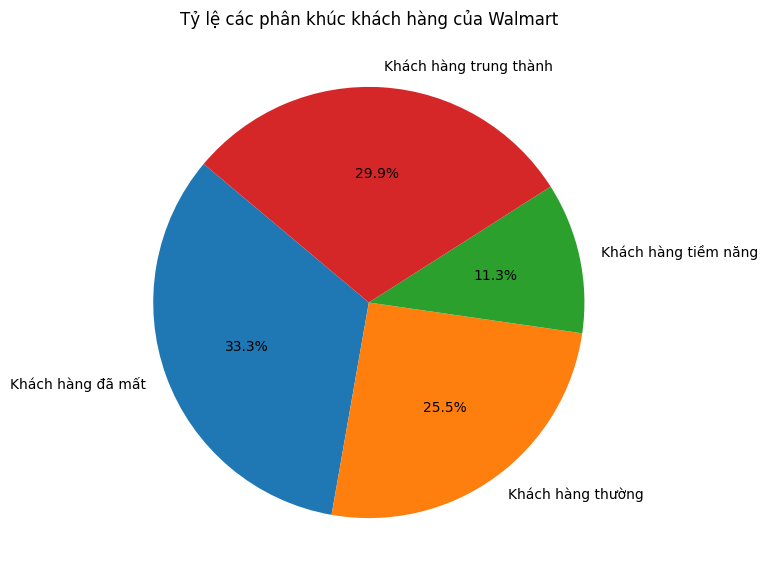

In [26]:
import matplotlib.pyplot as plt

# Đếm số lượng của từng phân khúc khách hàng
phan_khuc = combined_df.groupBy("Phan khuc").count()

# Quy về dataframe pandas và vẽ biểu đồ
phan_khuc_pd = phan_khuc.toPandas()

plt.figure(figsize=(10, 7))
plt.pie(phan_khuc_pd['count'], labels=phan_khuc_pd['Phan khuc'], autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ các phân khúc khách hàng của Walmart')
plt.show()